# Standalone Convergence Checker for the numerical vKdV solver

Copied from Standalone Convergence Checker for the numerical KdV solver - just add bathy

Does not save or require any input data

In [1]:
import xarray as xr
from iwaves.kdv.kdvimex import KdVImEx#from_netcdf
from iwaves.kdv.vkdv import vKdV 
from iwaves.kdv.solve import solve_kdv
from iwaves.utils.plot import vKdV_plot
import iwaves.utils.initial_conditions as ics

import numpy as np
from scipy.interpolate import PchipInterpolator as pchip
import matplotlib.pyplot as plt

%matplotlib inline

from matplotlib import rcParams

# Set font sizes
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Bitstream Vera Sans']
rcParams['font.serif'] = ['Bitstream Vera Sans']
rcParams["font.size"] = "14"
rcParams['axes.labelsize']='large'

In [16]:
# CONSTANTS FOR WHOLE NOTEBOOK
d = 252.5
L_d = 4.0e5
Nz = 100

# Functions

def run_kdv(args):
    """
    Main function for generating different soliton scenarios
    """
    rho_params, bathy_params, a0, L_d, mode, nu_H, dx, runtime, dt, Lw = args
    ####################################################
    # Inputs
    mode = 0
    
    Nz = 100

    ntout = 1800.0

    z = np.linspace(0, -d, Nz)

    dz = np.abs(z[1]-z[0])
    
    x = np.arange(-2*dx,L_d+dx,dx)
        
    h = ics.depth_tanh2(bathy_params, x)

    kdvargs = dict(\
        verbose=False,\
        a0=a0,\
        Lw=Lw,\
        mode=mode,
        dt=dt,\
        nu_H=nu_H,\
        ekdv=False,\
        wavefunc=ics.eta_fullsine,\
        #L_d = L_d,
        x=x,\
        Nsubset=10,
        nonlinear=False,
        nonhydrostatic=False
    )

    ###
#     THIS WAS COPIED FROM THE KdV VERSION. IT INITIALISES EACH vKdV 3 TIMES - QUITE SLOW. 
    ###
    
    ii=0
    #rhoz = single_tanh_rho(
    #        z, pp['rho0'][ii], pp['drho1'][ii], pp['z1'][ii], pp['h1'][ii])
    rhoz = ics.rho_double_tanh_rayson(rho_params,z)
    ######

    ## Call the vKdV run function
    mykdv, Bda = solve_kdv(rhoz, z, runtime,\
            solver='vkdv', h=h, ntout=ntout, outfile=None, **kdvargs)

    print('Done with dx={} and dt={}'.format(dx, dt))
    
    return mykdv, Bda

Text(0.5, 1.0, 'vKdV bathy')

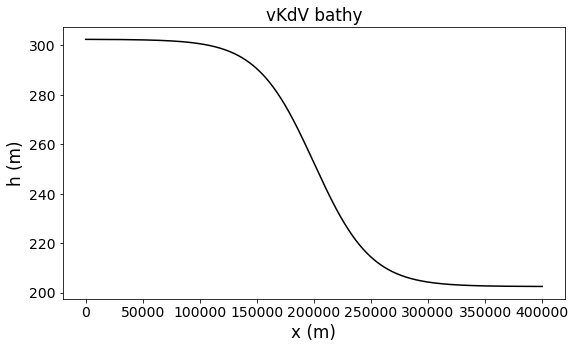

In [17]:
dx = 10
x = np.arange(-2*dx,L_d+dx,dx)
bathy_params = [L_d*0.5, 50000, d+50, d-50]       

h = ics.depth_tanh2(bathy_params, x)
    
plt.figure(figsize=(9,5))
plt.plot(x, h, 'k')
plt.ylabel('h (m)')
plt.xlabel('x (m)')
plt.title('vKdV bathy')

In [18]:
#betas = [1023.7, 1.12, 105, 52, 155, 43] # ~April 5data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAkAAAAFdCAYAAADrOtLuAAAABHNCSVQICAgIfAhkiAAAAAlwSFlzAAALEgAACxIB0t1+/AAAADh0RVh0U29mdHdhcmUAbWF0cGxvdGxpYiB2ZXJzaW9uMy4yLjIsIGh0dHA6Ly9tYXRwbG90bGliLm9yZy+WH4yJAAAgAElEQVR4nO3dd3gVVf7H8fc3JISEJhEwu1Q7CKhI7GBFsdd1VViwYkFxVZAisiDCAqIgP0XWhrAWXGyoWFAQhAVRKUsTsABSpEVKBCIlOb8/ZoKXaxISUuaWz+t55rk3M+fO/R6G8uHMnBlzziEiIiISTxKCLkBERESkvCkAiYiISNxRABIREZG4owAkIiIicUcBSEREROKOApCIiIjEHQUgEYk4ZtbXzEr1Hh1m1tDMnJn1KM39FvJ9o83st/L4LhEpPgUgESlVZnazHzROC1ufamaTzWyvmbUtxv5O8vc3qJA2h5rZbjN7uyS1F5eZ1fXD2onl+b0iUnIKQCJS5swsFfgAOBvo4Jx7vaifdc7NBb4F2pqZFdDsr0AS8GpJay2mukAfQAFIJMooAIlImQoLP+2LE35CvAbUA1oVsL0dsAX48KCKFJG4owAkIgdkZn/xT0OdX8xt4eFnbD5tLjWz+Wb2m5l9Z2a35VPCa4DDCzrhn28InAG86ZzbXcT+dDazFWaWbWazzOzUsO0NzOxZM1tqZjvNbKuZfWBmTULanAN86f/4sv9r4Mysb9i+DjOz/5hZlpltMbPnzaxSyPYZZja/gDq/MbPZRemTiBSPApCIFMUE4Ffghny23QBsAKaGrQ8NP38rIPycB7wHJAO9gVeAfwJXhbZzzv0ETAf+YmYVw3bTFjCKfvqrLdANeB7oD9QHJpnZMSFtTvbrfge4H3jKXzfNzNL9NkuAvv7754H2/vJOyH4SgE+B3f53jgc6Av8IaTMaON7Mjg8t0q8nA+/XRERKm3NOixYtWg644P1D/AuQFLKuCrATeDpk3c14ozUrgb3ADYXscw6wCUgLWdfY/5wLa9vR3+8VYesX+99lB6i/of/5XUDDkPXHAHuA10PWpebz+aOA34BeIetO8/d5cz7tR/vb+oetHw9sCvm5OpANPB7W7jG/rtpBH3stWmJx0QiQiBTVG0AacEHIuiuBFH9buMPwwsbK/Hbmj6ScBPzbObc5b71zbgkwMZ+PvOnvb99pMH/21XHAa865ok6bf985t68m59x3/vddHLJuZ8h3pJrZocBW4DugRRG/J8+zYT9/AdQ0s6r+d23DC0VtzSzB/07D6+enzrmNxfw+ESkCBSARKapPgc3sfxrsBmA1MDOf9ncB24GPwk/v+Br6r8vy2faHdc65rXin4i7PCw/8HoaKM/vr+3zWfQccYmbVAcyskpk9bmY/AzuATLyRqmbAIcX4rj3OuZ/D1m3xX9NC1o0B6gDn+j+fCRyOTn+JlBkFIBEpEufcHuBt4Eo/IBwCXAj8p4DRl2VAG/zrYMzs6LDteVPa8/tsQdPdX8UbcbraHy25EZjrjxoVuStF+L7hQBdgHN4U+zZ4I1+LKd7fm7mFbAv9zs+AdcDf/J//hnfN1XvF+C4RKQYFIBEpjjeAasAlwLVARfI//QWAc+5/wKVAVbwLjeuFbF7hvzbK56PH5LMO4CO8Uah2eBcp16H49/7Jb99HA1v901EA1+OdmrvfOfemc+5T59wkoEbY50rlbtXOuRy8flzrB8u/Am8557JLY/8i8kcKQCJSHFPxRiqu95cfnHNzCvuAc24GcA2QDnxmZrX89euBeUAHM9t3OsjMGuONuOS3r914ozLnAw8COcAfZpcdwOX+1Pm87zvG/75PQtrkEDYqZGY3An8O29cO/zU8GB2MMXhB8Tl/f/8uhX2KSAESgy5ARKKHcy7XzN7Em5FVERhYxM9NNLN2eKNFn5rZOf5oS3e84DHTzF7EO711L7AIOKGA3b2Kd33RZXgXCa8vZje+A6ab2Qi8/wTei3dx9aMhbd7HC2ZZfi0n4gW+5WH7+h7IAu42s+14p60WOecWFbMmnHOLzWwO3ujParyLpUWkjGgESESKayxeUKlAIae/wjnn3sILTicAH5pZqnPuM7x7/uwGBuDdR+dhvFlRBe1nBr8HkYN59MXrwOPAnXj341kNXOicWxrS5u/AS3ihZxjQBLjIbxtayy6863V2ASPwfm3+chA15Rnjv75ajFltInIQTH/GREQig5ndCfwLOK6YF3aLSDEpAImIRAgz+wbvBpCnBF2LSKzTNUAiIgEys8rA5XgPes0g/8eNiEgp0wiQiEiA/BlpK/DuNP2ic+6hQAsSiRMKQCIiIhJ3NAtMRERE4k5cXwNUs2ZN17Bhw6DLEBERkVIwZ86cTOdcraK0jesA1LBhQ2bPnh10GSIiIlIKzOynorbVKTARERGJOwpAIiIiEncUgERERCTuKACJiIhI3FEAEhERkbijACQiIiJxRwFIRERE4o4CkIiIiMQdBSARERGJO3F9J+iysHPnTl599VUSEhIws1J9LelnExMTi7RUqFCBhARlYxERiV0KQKVs69at3HnnnUGXUWJFDUxJSUlUqlSJ5OTk/V6Lsi4lJYUqVaoUuFSuXFlBTEREyoQCUCk77LDDWLNmDc45cnNzS+21pPvIyckhJyeHvXv3ltqyZ88e9uzZw65du/jtt9/YtWsXWVlZ+37OW5f3umvXrmL/eqamplKlShWqVq1KlSpVqFGjBmlpaaSlpRX4Pi0tjcMOO4xKlSqVwREWEZFYEFgAMrN7gDuBhv6qxUB/59yH/nYD+gB3ADWAr4B7nHOLQ/aRDDwB3AikAJOBTs65NeXUjT+oUKECderUCerrI5pzjt27d+8LRNnZ2ezYsYNff/2V7du3F7jkbf/111/ZsmULy5YtY/PmzWzevLnQUHXIIYfwpz/9ifT0dNLT0/d7X69ePRo2bEjdunVJTNT/A0RE4k2Qf/OvAboD3+NdjH0TMN7MWjjnFgDdgC7AzcAy4B/AZ2Z2rHPuV38fTwFX4gWgX4ChwAR/Hznl2Rk5MDMjOTmZ5OTkUttndnb2vjC0ZcsWNm/eTGZmJhs2bGDdunWsX7+e9evX89VXX7Fu3Tqys7P3+3xCQgJ169alYcOG+5bDDz+cRo0a0ahRIw455JBSq1VERCKHOeeCrmEfM9sM9ASeB34GnnHODfC3pQAbga7OuefMrDqwCbjFOfea36Ye8BNwsXNu4oG+LyMjw82ePbtsOiMRxznH9u3bWbduHatXr2blypWsXLmSn376ad/7tWvXkpubu+8z6enp+8JQo0aNaNasGc2bN6dGjRoB9kRERPJjZnOccxlFaRsRY/9mVgG4DqgCzAQOB9KBT/PaOOeyzWwacAbwHNACSAprs9rMlvhtDhiAJL6YGVWrVqVq1aocc8wx+bbZs2cPK1euZNmyZSxZsoSlS5eyZMkS3njjDbZu3bqv3eGHH07z5s056aSTOOmkkzj55JOpWbNmeXVFRERKKNAAZGbNgC+BSsB24Grn3EIzO8NvsiHsIxuAvAts0oEcIDOfNumFfOcdeNcVUb9+/RLVL7EnKSmJo48+mqOPPprLLrts33rnHBs3bmTBggXMnTuXuXPnMm/ePN555519bRo3bkzLli1p2bIlrVq1omHDhniXsomISKQJ9BSYmVUE6gOHANcCHYFzgGrADKC+c251SPuXgT855y4ys7bAv4EkF9IJM5sCLHPO3XWg79cpMCmprKws5s2bx5dffsl///tfZsyYsW+kqE6dOlx44YW0adOGCy64gLS0tICrFRGJbVFzCsw5txv4wf9xtpmdDDwADPDXpQOrQz5Sm99HhdYDFYCaeNcChbaZVlY1i4SqVq0aZ599NmeffTYAubm5LF68mP/+979MmTKF8ePH8/LLL5OQkMDJJ5/MRRddxDXXXEOzZs00OiQiEqBIu8tcApAMrMALOBfkbTCzSkArvGuEAOYAe8La1AUah7QRKVcJCQk0a9aMu+++m3HjxrFx40ZmzpxJ7969AejXrx8nnHACjRo1olevXsybN49ImoggIhIvAjsFZmaDgA/xRniqAm3xpsVf6pz72My6A73wpsF/BzwCnAXsmwZvZiOBK/Cm0OdNg68BFGkavE6BSXnbsGED48eP56233mLKlCnk5ORw1FFHcfPNN3PTTTdRt27doEsUEYlaxTkFFmQAGg2ci3eaaxuwABiSN3095EaId7L/jRAXheyjEjAELzyF3ggx9LRZgRSAJEiZmZmMHz+e1157jalTp2JmXHjhhdxyyy1cffXVVKxYMegSRUSiSlQEoEigACSRYvny5YwePZoxY8awatUq0tPTufvuu7nrrruoXbt20OWJiESF4gSgSLsGSCQuHXHEEfTr148VK1bwySef0Lx5c/r06UO9evW45ZZbWLRo0YF3IiIiRaYAJBJBEhISaNOmDR999BFLlizh9ttvZ9y4cTRr1ozrrruOhQsXBl2iiEhMUAASiVCNGjVixIgRrFq1il69ejFx4kSOP/54rr32Wo0IiYiUkAKQSIQ79NBD6d+/PytXrqR3795MmjSJE044gY4dO7J+/fqgyxMRiUoKQCJRIi0tbd91Qvfddx+jR4/mqKOOon///uzcuTPo8kREoooCkEiUSUtLY9iwYXz77bdceOGF9O7dm6ZNmzJxop7/KyJSVApAIlHq6KOP5p133uHzzz+nYsWKXHTRRbRt25YNG8KfISwiIuEUgESi3Lnnnsv8+fPp06cPb7/9No0aNeLVV1/VIzZERAqhACQSA5KTk+nbty/z58/nuOOOo3379tx4441s2bIl6NJERCKSApBIDGnUqBFffPEF/fv35+2336ZZs2ZMnjw56LJERCKOApBIjElMTKRXr17MmjWLqlWrcsEFF9CvXz9yc3ODLk1EJGIoAInEqBYtWjBnzhzat29Pnz59uOyyy/jll1+CLktEJCIoAInEsNTUVEaPHs3IkSOZPHkyLVq0YO7cuUGXJSISOAUgkRhnZtx1111Mnz6d3NxcWrVqxXvvvRd0WSIigVIAEokTp5xyCl9//TVNmjTh6quvZtiwYZoqLyJxSwFIJI6kp6czdepUrrnmGh588EHuuececnJygi5LRKTcKQCJxJnU1FTGjRtHt27dGDlyJDfeeCO7d+8OuiwRkXKVGHQBIlL+EhISGDx4MLVr16Zr165s376dt956i9TU1KBLExEpFxoBEoljXbp04YUXXuCTTz7hoosuIisrK+iSRETKhQKQSJy7/fbbGTt2LF9++SUXXnghv/76a9AliYiUOQUgEeH666/nzTffZM6cOVxyySXs2LEj6JJERMqUApCIAHDVVVfx+uuvM3PmTK644gqys7ODLklEpMwoAInIPtdddx3//ve/mTJlCldffbVmh4lIzFIAEpH9tGvXjhdffJGJEydy66236iGqIhKTNA1eRP7g1ltvZcOGDTz88MP8+c9/5vHHHw+6JBGRUqUAJCL56tGjB2vXrmXIkCHUqVOHv//970GXJCJSahSARCRfZsbw4cP5+eefeeCBB6hbty7XXntt0GWJiJQKXQMkIgWqUKECr732Gqeddhrt27dn3rx5QZckIlIqFIBEpFApKSm8++67HHrooVx55ZVs2LAh6JJEREpMAUhEDuiwww7jvffeIzMzk2uuuYZdu3YFXZKISIkoAIlIkZx00kmMHj2amTNn0qlTJ5xzQZckInLQFIBEpMj++te/0qtXL0aNGsWoUaOCLkdE5KApAIlIsTz66KO0bt2ae++9l/nz5wddjojIQVEAEpFiyZsZVqNGDa677jqysrKCLklEpNgUgESk2GrXrs0bb7zB8uXLuf3223U9kIhEHQUgETkoZ511FgMGDODNN9/k2WefDbocEZFiUQASkYP20EMPcfHFF9O1a1eWLFkSdDkiIkWmACQiBy0hIYFRo0ZRpUoV2rVrx+7du4MuSUSkSBSARKRE0tPTefHFF5k3bx59+vQJuhwRkSIJLACZWU8z+8bMssxsk5l9YGZNw9pUMbOnzWyNmWWb2TIzeyCsTbLfJtPMdpjZ+2ZWt3x7IxLfrrzySjp27MjgwYOZNm1a0OWIiBxQkCNA5wDPAmcA5wF7gUlmlhbSZihwKdAeaAwMAAaZWfuQNk8B1wI3Aq2AasAEM6tQ1h0Qkd8NHTqUI488kvbt22tqvIhEvMACkHOujXPuZefcIufcQryQUws4M6TZGcArzrkpzrmVzrl/A7OAUwHMrDpwG/CQc+4z59xcfz/HA63Lsz8i8a5KlSq88sorrFmzhm7dugVdjohIoSLpGqCqePVsCVn3X+ByM6sHYGZnACcCn/jbWwBJwKd5H3DOrQaW4IUnESlHp512Gg888ADPPfccU6ZMCbocEZECRVIAGg78D/gyZN19/rpVZrYH+ALo7pyb4G9PB3KAzLB9bfC3/YGZ3WFms81s9qZNm0qzfhEB+vXrx1FHHcXtt9/Ojh07gi5HRCRfERGAzGwo0BK41jmXE7KpM94psSvwRnseAJ4ws4sOtEsg31vTOueed85lOOcyatWqVfLiRWQ/qampvPTSSyxfvpxHHnkk6HJERPIVeAAys2F4FzCf55xbHrI+BRgIdHPOfeCcW+CcewZ4A+jqN1sPVABqhu22Nt4okIgE4KyzzqJTp04MHz6cL7/88sAfEBEpZ4EGIDMbDrTFCz9LwzYn+UtO2Pocfq97DrAHuCBkn3XxZozNLIuaRaRoBg0aRL169bjtttt0g0QRiThB3gdoBHAL3ujPFjNL95cqAM65LLxrfgaZ2TlmdriZ3Qx0AN7122wDXgKGmFlrM2sOvAIsACaVe6dEZJ+qVasycuRIlixZwtChQ4MuR0RkPxbUU5zNrKAvftQ519dvk453GuxCIA34CXgReNL5hZtZJWAI3khSCjAZ6OTPBitURkaGmz17dgl7IiKFueaaa/jkk09YsmQJDRo0CLocEYlhZjbHOZdRpLZBBaBIoAAkUvZWr15N48aNOf/883nvvfeCLkdEYlhxAlDgF0GLSGyrV68effr04f333+f9998PuhwREUAjQBoBEikHe/bsoXnz5mzfvp3FixdTuXLloEsSkRikESARiShJSUmMHDmSn376iQEDBgRdjoiIApCIlI9WrVrRvn17nnzySZYvX37gD4iIlCEFIBEpNwMHDiQxMVEPSxWRwCkAiUi5qVOnDj179uTtt9/miy++CLocEYljCkAiUq66dOlCgwYN+Pvf/05OTviN3kVEyocCkIiUq5SUFB5//HHmz5/PqFGjgi5HROKUApCIlLvrrruOli1b0qtXL7Zt2xZ0OSIShxSARKTcmRlPPfUUmZmZ/POf/wy6HBGJQwpAIhKIFi1a0KFDB4YPH87q1Qd8dJ+ISKlSABKRwPTr1w+Af/zjHwFXIiLxRgFIRAJTv359OnfuzJgxY1i4cGHQ5YhIHFEAEpFA9ezZk2rVqvHwww8HXYqIxBEFIBEJVFpaGj179mTChAlMmzYt6HJEJE4oAIlI4O677z7q1KlD9+7dcc4FXY6IxAEFIBEJXEpKCo8++iizZs3i3XffDbocEYkDFs//28rIyHCzZ88OugwRAfbu3csJJ5xATk4OixYtIjExMeiSRCTKmNkc51xGUdpqBEhEIkJiYiL9+/dn2bJlvPbaa0GXIyIxTiNAGgESiRjOOTIyMti6dStLly4lKSkp6JJEJIpoBEhEopKZ0a9fP5YvX87o0aODLkdEYpgCkIhElEsuuYRTTz2Vxx57jF27dgVdjojEKAUgEYkoZsZjjz3G6tWrefHFF4MuR0RilAKQiESc1q1b06pVKwYMGEB2dnbQ5YhIDFIAEpGIkzcKtG7dOv71r38FXY6IxCAFIBGJSGeffTbnnXcegwYNYseOHUGXIyIxRgFIRCLWY489xsaNG3nmmWeCLkVEYowCkIhErDPOOIM2bdrwxBNPaBRIREqVApCIRLTevXuTmZnJc889F3QpIhJDFIBEJKKdeeaZnHvuuQwZMkQzwkSk1CgAiUjE6927N+vXr2fUqFFBlyIiMUIBSEQi3jnnnMMZZ5zB4MGD2b17d9DliEgMUAASkYhnZvTu3ZvVq1czZsyYoMsRkRigACQiUaFNmzZkZGQwcOBA9uzZE3Q5IhLlFIBEJCrkjQKtWLGC119/PehyRCTKmXMu6BoCk5GR4WbPnh10GSJSRM45mjdvTnZ2Nt9++y0VKlQIuiQRiSBmNsc5l1GUthoBEpGoYWY88sgjfPfdd4wbNy7ockQkimkESCNAIlElNzeXZs2aYWYsWLCAhAT9P05EPFExAmRmPc3sGzPLMrNNZvaBmTXNp90xZvaOmW01s51mNtfMGodsTzazp80s08x2mNn7Zla3fHsjIuUlISGBhx9+mMWLFzNhwoSgyxGRKBXkf53OAZ4FzgDOA/YCk8wsLa+BmR0OzABW+G2aAo8A20P28xRwLXAj0AqoBkwwM10cIBKjrr/+eho2bMjAgQOJ51FsETl4BxWAzKyKmVUuyRc759o45152zi1yzi0E2gO1gDNDmg0APnXOdXHOzXXOLXfOfeScW+3XUR24DXjIOfeZc26uv5/jgdYlqU9EIldiYiJdu3Zl1qxZTJ8+PehyRCQKFSkAmdl5/mmmeWaWDWwDssws2z8l9YyZnV/CWqr69WzxvzMBuBz41sw+8U+TfWNm14d8pgWQBHyat8IPR0vwRpZEJEbdeuut1KpVi4EDBwZdiohEoQIDkJklmdm9ZrYCmAS0AzKBfwOPA0P895v9bZ+Z2U9m1tnMkg6iluHA/4Av/Z9rA1WAh/ECzgXAWOA1M7vMb5MO5Ph1hdrgb8uvX3eY2Wwzm71p06aDKFNEIkFKSgr3338/n3zyCf/73/+CLkdEokyBs8DM7CegEl7I+Y9zrtDpUmZ2KnAd3imo35xzDYpchNlQ4AagpXNuub/uz8BaYKxzrm1I29eBGs65i82srV9fkgvpiJlNAZY55+4q7Hs1C0wkum3dupX69etz6aWXMnbs2KDLEZGAldYssMeBBs65hw4UfgCcc18557oCDfzPFomZDcO7gPm8vPDjy8S7MPrbsI8sAer779cDFYCaYW1q440CiUgMO+SQQ7j77rsZN24cP/74Y9DliEgUKTAAOedGOOd+K+4OnXO/OedGFKWtmQ0H2uKFn6Vh+9kNfAMcG/axY4Cf/PdzgD14p8fy9lkXaAzMLG7tIhJ97r//fhITE3niiSeCLkVEokiQ9wEaAdyCN/qzxczS/aVKSLPHgev963aOMrOOeKfKRgA457YBLwFDzKy1mTUHXgEW4F23JCIx7k9/+hM333wzL7/8MuvXrw+6HBGJEsW6E7R/cfNlwJFADcDCmjjnXK8i7qugL37UOdc3pN3NeBdC1wO+BwY658aGbK+Ed0F2WyAFmAx0ypsqXxhdAyQSG3744QeOPfZYHnroIQYNGhR0OSISkOJcA1TkAGRmpwNvA4fxx+CTxznnouYGhApAIrHjhhtu4OOPP2bVqlVUr1496HJEJABl9SiM5/AuOL4BaIg3AhS+pBX0YRGRstS9e3eysrIYOXJk0KWISBQoTgA6GhjknHvTObfKObctv6WsChURKUzz5s256KKLeOqpp8jOzg66HBGJcMUJQN8CyWVViIhISfXo0YMNGzYwevTooEsRkQhXnADUC7jHzI4qq2JERErirLPO4rTTTmPIkCHs3bs36HJEJIIlFrWhc+4TM+sCLDKzGcAavMdQhDVzt5VmgSIiRWVm9OjRg6uuuoq33nqLG264IeiSRCRCFWcWWGvgPbyp5gC78mnmnHOppVRbmdMsMJHYk5ubS9OmTalYsSLz5s3DrKBJqyISa8pqFthTwEbgbKCScy4lnyVqwo+IxKaEhAS6devG/PnzmThxYtDliEiEKk4AOgIY6pyb7j+mQkQkIrVt25a6desyePDgoEsRkQhVnAC0ADi0rAoRESktFStWpEuXLkydOpVZs2YFXY6IRKDiBKAuwO1mdmZZFSMiUlpuv/12atSooVEgEclXkWeB4U2D3w5MM7PvgFXkPwvs0tIqTkTkYFWpUoXOnTvTr18/lixZQuPGjYMuSUQiSHFGgI7DuxHiKqAScAzQOJ9FRCQidO7cmZSUFIYMGRJ0KSISYYocgJxzDZ1zhx9gOaIsixURKY6aNWty++238+qrr7JmzZqgyxGRCFKcESARkajTpUsXcnNzGTZsWNCliEgEKTAAmdkhB7vTknxWRKQ0NWjQgBtvvJHnnnuOzZs3B12OiESIwkaAVpnZQDNrWNSdmdkRZjYE+KmkhYmIlJZu3bqxY8cOnn322aBLEZEIUVgA6gBcCvxoZl+a2WNmdqWZHW9m9cysvpmdYGZXmVl/M/sK+B64yP+siEhEaNasGZdeeinDhw9n586dQZcjIhGgwADknBsPnABcAazFuw/Qu8A8YCWwApgLvAM86Le5AjjeOfdemVYtIlJMPXr0IDMzk1GjRgVdiohEgOI8DDUJyAAaATX91ZnAEmCOc25PmVRYhvQwVJH40rJlS9asWcP3339PUlJS0OWISCkrzsNQi3wjRD/gfOkvIiJRp3v37lxxxRWMGzeOdu3aBV2OiARI0+BFJG5ceumlNGnShMGDB1PU0W8RiU0KQCISNxISEujWrRsLFy7k448/DrocEQmQApCIxJUbb7yRevXqMWjQoKBLEZEAKQCJSFxJSkqia9euTJ8+nZkzZwZdjogERAFIROLObbfdxqGHHsrgwYODLkVEAqIAJCJxp3LlynTu3Jn333+fxYsXB12OiASg2AHIzKqaWRMza2VmZ4UvZVGkiEhpu/fee0lNTWXIkCFBlyIiAShyADKzGmb2KvALsACYCkwJWfJ+FhGJeIceeigdO3bktddeY9WqVUGXIyLlrDgjQM8B1wMjgGuB88KWc/1XEZGo8OCDDwIwdOjQgCsRkfJWnEdh/Ao875zrUrYllR89CkNEbrrpJt566y1WrVrFoYceGnQ5IlICxXkURnFGgHbhPe1dRCRmdOvWjZ07d/LMM88EXYqIlKPiBBldZkoAAB2RSURBVKC3gIvLqhARkSA0adKEyy+/nP/7v/9jx44dQZcjIuWkwABkZrVDF+AJ4M9mNsbMTjOzP4W38duJiESVHj16sHnzZl566aWgSxGRclLgNUBmlguEbzT/tcALh5xzFUqntLKna4BEJM9ZZ53FypUr+fHHH0lKSgq6HBE5CMW5BiixkG39KCToiIjEku7du3PZZZcxduxYOnToEHQ5IlLGijwLLBZpBEhE8jjnOP7443HOsWDBAhISdKN8kWhTVrPARERilpnRvXt3Fi9ezIcffhh0OSJSxhSARER8119/PQ0aNNBDUkXigAKQiIgvKSmJrl27MmPGDKZOnRp0OSJShgILQGbW08y+MbMsM9tkZh+YWdNC2j9vZs7MuoatTzazp80s08x2mNn7Zla37HsgIrHotttuIz09nX79+gVdioiUoSBHgM4BngXOwHuG2F5gkpmlhTc0s78AJwM/57Ofp/CeTXYj0AqoBkwws6iZji8ikSMlJYXu3bszZcoUpk+fHnQ5IlJGImYWmJlVAbYBVznnPghZ3wCYCbQGPgaecc494W+rDmwCbnHOveavqwf8BFzsnJtY2HdqFpiI5Gfnzp0cccQRNG3alEmTJgVdjogUUbTOAquKV8+WvBVmlgiMBfo755bk85kWQBLwad4K59xqYAneyJKISLGlpqby0EMPMXnyZGbMmBF0OSJSBiIpAA0H/gd8GbLuUeAX59zIAj6TDuQAmWHrN/jb/sDM7jCz2WY2e9OmTSUsWURi1V133UWtWrV0LZBIjIqIAGRmQ4GWwLXOuRx/3dnAzcCtB7NLCriLtXPueedchnMuo1atWgdZsYjEusqVK9O1a1c+/fRTZs2aFXQ5IlLKAg9AZjYM7wLm85xzy0M2nQv8CVhnZnvNbC/QABhsZmv8NuuBCkDNsN3WxhsFEhE5aJ06daJmzZo8+uijQZciIqUs0ABkZsOBtnjhZ2nY5meB44ETQ5afgWHA+X6bOcAe4IKQfdYFGuNdOC0ictCqVKlCly5d+OSTT/j666+DLkdESlGQ9wEaAdyCN/qzxczS/aUKgHNuo3NuUeiCF3bWO+eW+W22AS8BQ8ystZk1B14BFgCauiEiJXbPPfeQlpama4FEYkyQI0Cd8GZ+TQbWhSxdC/tQPh4A3gH+A8wAtgOX511LJCJSElWrVuXBBx/kww8/RLfNEIkdEXMfoCDoPkAiUhRZWVk0bNiQ008/XQ9KFYlg0XofIBGRiFStWjW6d+/ORx99pPsCicQIBSARkSK49957Oeyww3j44YeJ55FzkVihACQiUgSVK1fmkUceYdq0aXz22WdBlyMiJaQAJCJSRB07dqR+/fr06tVLo0AiUU4BSESkiJKTk+nbty+zZ89m/PjxQZcjIiWgWWCaBSYixbB3716aNm1KYmIi8+fPp0KFCkGXJCI+zQITESkjiYmJ9OvXj8WLFzN27NigyxGRg6QRII0AiUgx5ebm0qJFC7Kysli6dClJSUlBlyQiaARIRKRMJSQkMGDAAJYvX87zzz8fdDkichAUgEREDsLFF1/MueeeS9++fdm2bVvQ5YhIMSkAiYgcBDPjiSeeIDMzk0GDBgVdjogUkwKQiMhBOumkk/jb3/7GsGHDWLVqVdDliEgxKACJiJTAgAEDAHjkkUcCrkREikMBSESkBOrXr88DDzzAK6+8wty5c4MuR0SKSAFIRKSEevToQc2aNenSpYsekSESJRSARERKqHr16vTp04epU6cyYcKEoMsRkSLQjRB1I0QRKQV79uyhWbNm5OTksGjRIpKTk4MuSSTu6EaIIiLlLCkpieHDh/PDDz8wbNiwoMsRkQNQABIRKSVt2rThyiuvpH///qxduzbockSkEApAIiKlaOjQoezdu5eHHnoo6FJEpBAKQCIipeiII46gW7dujB07lmnTpgVdjogUQAFIRKSU9ejRg/r169O5c2f27t0bdDkikg8FIBGRUpaamsqTTz7JggULGDlyZNDliEg+FIBERMrAtddeywUXXECvXr10QbRIBFIAEhEpA2bGyJEj2bNnD507dw66HBEJowAkIlJGjjzySPr27cu7777L+PHjgy5HRELoTtC6E7SIlKE9e/aQkZHBL7/8wrfffku1atWCLkkkZulO0CIiESIpKYkXXniBn3/+mV69egVdjoj4FIBERMrYKaecwr333suIESOYNWtW0OWICApAIiLlYsCAAdSrV4+bb76Z7OzsoMsRiXsKQCIi5aBq1aqMGjWKZcuW6VSYSARQABIRKSfnn38+99xzD0899RRffPFF0OWIxDXNAtMsMBEpRzt27OCEE04gNzeX+fPnU7Vq1aBLEokZmgUmIhKhKleuzJgxY1i5cqWeGC8SIAUgEZFyduaZZ9KlSxeee+45Pvjgg6DLEYlLCkAiIgHo378/J554IrfccoueFSYSAAUgEZEAJCcn88Ybb/Dbb7/Rrl07cnJygi5JJK4oAImIBOTYY49lxIgRfPHFFwwYMCDockTiSmAByMx6mtk3ZpZlZpvM7AMzaxqyPcnMBpvZAjPbYWbrzOx1M6sftp9kM3vazDL9du+bWd3y75GISPF16NCBdu3a8eijjzJ9+vSgyxGJG0GOAJ0DPAucAZwH7AUmmVmavz0VOAkY4L9eCdQDPjGzxJD9PAVcC9wItAKqARPMrEI59EFEpETMjJEjR3LEEUdwww03sH79+qBLEokLEXMfIDOrAmwDrnLO5TstwsyOAxYDxzvnFppZdWATcItz7jW/TT3gJ+Bi59zEwr5T9wESkUgxf/58Tj/9dDIyMpg8eTJJSUlBlyQSdaL1PkBV8erZUkibav5rXpsWQBLwaV4D59xqYAneyJKISFQ44YQTePHFF5k+fTpdunQJuhyRmBdJAWg48D/gy/w2mllF4EngA+fcGn91OpADZIY13+Bvy28/d5jZbDObvWnTplIpXESkNLRt25YHHniAp59+mldeeSXockRiWkQEIDMbCrQErnXO/WEuqH/Nz6vAIcAtRdklkO+5Pefc8865DOdcRq1atUpQtYhI6Xv88cc555xzuOOOO5gzZ07Q5YjErMADkJkNw7uA+Tzn3PJ8ticCY4HjgfOdc7+EbF4PVABqhn2sNt4okIhIVElMTOQ///kPhx12GJdddhmrVq0KuiSRmBRoADKz4UBbvPCzNJ/tScB/8MLPuc658OkRc4A9wAUhn6kLNAZmllXdIiJlqXbt2nz44YdkZ2dz2WWXkZWVFXRJIjEnyPsAjcA7nXUjsMXM0v2lir89EXgTOM1v40LapAA457YBLwFDzKy1mTUHXgEWAJPKv1ciIqWjSZMmvPXWWyxZsoS//vWv7NmzJ+iSRGJKkCNAnfBmfk0G1oUsXf3tdfHu/fNnvJGe0DbXh+znAeAdvJGiGcB24PL8riUSEYkmrVu35l//+hcTJ07knnvuIVJuWyISCxIP3KRsOOfsANtX4l3MfKD9/AZ09hcRkZhy2223sWLFCgYMGEDNmjX55z//GXRJIjEhsAAkIiJF89hjj/HLL78wcOBAqlevTvfu3YMuSSTqKQCJiEQ4M2PEiBFkZWXRo0cPqlevzl133RV0WSJRTQFIRCQKJCQkMHr0aLKysujUqRMpKSncdNNNQZclErUCvw+QiIgUTVJSEuPGjeP888/nlltu4cUXXwy6JJGopQAkIhJFUlJSeP/992nTpg0dO3bk2WefDbokkaikACQiEmVSUlIYP348V1xxBffccw/Dhg0LuiSRqKMAJCIShZKTk3nzzTf5y1/+woMPPkiPHj3Izc0NuiyRqKGLoEVEolTFihUZO3YsNWvWZPDgwaxZs4ZRo0ZRsWLFoEsTiXgKQCIiUSwxMZFnn32W+vXr8/DDD7Nu3TreeecdqlevHnRpIhFNp8BERKKcmdGzZ0/GjBnDtGnTOPXUU1m2bFnQZYlENAUgEZEY0aFDByZNmsTmzZs55ZRTmDBhQtAliUQsBSARkRhy9tlnM3v2bI488kiuuOIKHnvsMV0cLZIPBSARkRhTv359/vvf/9K2bVv+8Y9/0KZNG9atWxd0WSIRRQFIRCQGpaam8sorr/D8888zY8YMTjjhBD7++OOgyxKJGApAIiIxyszo2LEjs2fPJj09nUsuuYT77ruPHTt2BF2aSOAUgEREYtxxxx3H119/zX333cfTTz9Ns2bNmDx5ctBliQRKAUhEJA5UqlSJ4cOHM23aNBITE2ndujV33HEHW7duDbo0kUAoAImIxJFWrVoxf/58unXrxksvvcQxxxzDCy+8QE5OTtCliZQrBSARkTiTkpLC4MGDmTNnDo0aNeKOO+7glFNOYcaMGUGXJlJuFIBEROLUiSeeyBdffMEbb7zBxo0badmyJVdffTWLFi0KujSRMqcAJCISx8yM66+/nqVLl9KvXz8+//xzjj/+eNq1a8f3338fdHkiZUYBSEREqFy5Mr1792bFihV0796d8ePH07hxY9q2bcu8efOCLk+k1CkAiYjIPmlpaQwcOJAff/yR+++/nwkTJnDSSSfRunVrJk6ciHMu6BJFSoUCkIiI/EF6ejpPPPEEq1evZvDgwSxZsoSLLrqIRo0a8eSTT5KZmRl0iSIlogAkIiIFql69Ot26dWPFihWMGTOGmjVr0rVrV+rUqUPbtm2ZPHmyptBLVFIAEhGRA6pYsSIdOnRgxowZLFy4kDvvvJOPPvqI1q1bU7duXf7+978za9YsnSKTqGHx/Js1IyPDzZ49O+gyRESiUnZ2Nh9++CGvv/46H330Ebt27eLwww/nyiuv5PLLL6dVq1YkJSUFXabEETOb45zLKFJbBSAFIBGRktq2bRvvvvsu48aN4/PPP2fXrl1Uq1aNiy66iEsvvZTzzz+fOnXqBF2mxDgFoCJSABIRKX3bt29n8uTJfPDBB3z44YesX78egKOPPppzzz2Xc889l3POOYf09PSAK5VYowBURApAIiJlKzc3l/nz5zNlyhSmTJnCtGnTyMrKAuDwww/nlFNO4dRTT+WUU06hefPmpKamBlyxRDMFoCJSABIRKV979+5l3rx5fPHFF3z11Vd8/fXXrFq1CoAKFSrQpEkTmjVrRrNmzWjatCnNmjWjXr16mFnAlUs0UAAqIgUgEZHgrV+/nq+//pqvv/6auXPnsnDhQtasWbNve7Vq1WjSpAlHH300Rx111H5LjRo1AqxcIo0CUBEpAImIRKatW7eyaNEiFi5cyMKFC/n222/58ccf9wtG4N25umHDhtSrV4+6detSt27d/d7XqVOHSpUqBdQLKW8KQEWkACQiEl2ys7NZvnw5P/zww77lp59+Ys2aNaxevZqtW7f+4TPVq1enVq1a1K5dm1q1au33vnbt2tSsWZPq1atzyCGH7HtVaIpOxQlAiWVdjIiISGlJSUmhSZMmNGnSJN/t27dvZ+3ataxZs2bfsnHjRjZu3MimTZtYvnw5X331FZs2bSr0DtbJycl/CEXVqlWjcuXKpKam7vda0LqUlBSSk5OpWLEiycnJ+5aKFSuSlJSk65oCpgAkIiIxo0qVKhx77LEce+yxhbbLzc1l69atbNq0iczMTLZt28bWrVsLfN26dStr165l586d7NixY9/rwTKzfcEov4BUsWJFEhMTSUxMpEKFCiV+X6FCBcyMhIQEEhIS9r0Pfy3quuK0z+tv3pKUlMQll1xy0L92pUUBSERE4k5CQgJpaWmkpaUdMCwVxDlHdnb2vjAUGox27NhBdnY2u3btYteuXezevTvf9wX9vHv3bnJycti7dy979+5l9+7d+96Hri/q+0h6XlvVqlX33QohSApAIiIiB8HMSE1NJTU1lZo1awZdzgE553DOkZubS25u7r73ha0rSfvc3Nz9vjdvSUiIjMeQBhaAzKwncA1wLLALmAX0dM4tCmljQB/gDqAG8BVwj3NucUibZOAJ4EYgBZgMdHLO7T9VQEREJI7lnYKKlAAStCB/Fc4BngXOAM4D9gKTzCwtpE03oAvQGTgZ2Ah8ZmZVQ9o8BVyLF4BaAdWACWZWoaw7ICIiItEpsBEg51yb0J/NrD2wDTgT+MAf/bkfGOSce9tvcxNeCGoLPGdm1YHbgFucc5+F7OcnoDUwsZy6IyIiIlEkksbBquLVs8X/+XAgHfg0r4FzLhuYhjdqBNACSAprsxpYEtJGREREZD+RFICGA/8DvvR/zntM8IawdhtCtqUDOUBmIW1ERERE9hMRs8DMbCjQEmjpnAufqxd+q2rLZ90fdllQGzO7A++iaurXr1/8YkVERCTqBT4CZGbD8C5gPs85tzxk03r/NXwkpza/jwqtByoA4fMPQ9vsxzn3vHMuwzmXUatWrRLVLiIiItEp0ABkZsPxLmg+zzm3NGzzCryAc0FI+0p4M71m+qvmAHvC2tQFGoe0EREREdlPkPcBGgG0B64CtphZ3kjPdufcduecM7OngF5mthT4DngE2A68DuCc22ZmLwFDzGwj8AswFFgATCrfHomIiEi0CPIaoE7+6+Sw9Y8Cff33j+Pd3HAEv98I8ULn3K8h7R/Au4fQf/j9Rogd8rmWSERERAQAc+5A1xPHroyMDDd79uygyxAREZFSYGZznHMZRWobzwHIzDbh3TSxLNTkj9PzY436GBvUx9igPsYG9bFkGjjnijTDKa4DUFkys9lFTaHRSn2MDepjbFAfY4P6WH4CnwYvIiIiUt4UgERERCTuKACVneeDLqAcqI+xQX2MDepjbFAfy4muARIREZG4oxEgERERiTsKQCIiIhJ3FIBKmZl1MrMVZvabmc0xs1ZB1wRgZn3NzIUt60O2m9/mZzPLNrOpZtYkbB/JZva0mWWa2Q4ze99/9lpomxpm9oqZbfOXV8zskLA29c3sA38fmWb2f2ZW8SD6dJZfw1q/PzeHbY+oPplZMzP7wq9lrZn9w8yshH0cnc9xnRUtfTSznmb2jZllmdkmf/9Nw9pE9XEsYh+j/TjeY2YL/D5mmdmXZnZpyPaoPobF6GdUH8d8+vuw34dnQtbFxLEEwDmnpZQW4Hq8h7N2xHsg69N4zy6rHwG19QWWAukhS62Q7d2BX4FrgabAOOBnoGpIm5H+uguAk4CpwP+ACiFtPgYWA2cAp/vvPwjZXgFY6H/2JH9fPwNPH0SfLgH+CfwF2AncHLY9YvoEVMN7uO84v5Zr/dq6lLCPo4HPwo5rWlibiO0jMBG4xW/fDHjX30daSJuoPo5F7GO0H8crgYuBo4BjgAF4fxceHwvHsBj9jOrjGFbnaXgPJZ8PPBMrfx7362NRGmkp2oL3rLIXwtZ9DwyMgNr6AosK2GbAOqBXyLoU/zfSnf7P1YHdQLuQNvWAXKCN/3NjwAFnhrRp6a871v/5Yv8z9ULa/A34DahWgv5tJyQcRFqfgLuBLCAlpM0jwFr8yQjF7aO/bjQwoZDPRFsfqwA5wOUxfBz362MsHkf/M5uBO2PxGObXz1g6jn6dPwLn4QWQZ2Lxz6NOgZUSf1iuBfBp2KZP8RJuJDjCHyJcYWZvmNkR/vrD8f6nsq9251w2MI3fa28BJIW1WQ0sCWlzOt4/0jNDvnMGsCOszRL/s3kmAsn+d5SWSOvT6cB0v4bQNn8GGh5MB0O0NLONZvadmb1gZrVDtkVbH6vinZrf4v8ci8cxvI95YuI4mlkFM7sBL+jNJDaPYX79zBMLx/F54C3n3Odh62PqWCoAlZ6aeEN2G8LWb8D7DRO0r4Cb8VJ1R7yaZprZofxeX2G1p+P9rzX8+S3hbTY5P4YD+O83hrUJ/55Mf9+l+esUaX3Kr82GkG0H6xOgA3A+0AU4BfjczJJD9h1NfRyON1T+ZdjnYuk4hvcRYuA4+tdibAd2Af8CrnbOLSTGjmEh/YTYOI4d8U7x9c5nc0wdy8QDNZBic2E/Wz7ryp1z7uPQn/0L85YDNwF5F+kdTO3hbfJrX5Q2ha0viUjqU361FPbZA3LOvRHy40Izm4P3gN9LgXcK+WjE9dHMhuINg7d0zuUU8h351ZbvLg9QW1HbhK8v9T7GyHFcBpwIHIJ3LcYYMzvnAPuMumNIAf10zi2K9uNoZsfiXXPYyjm3u8BqY+RYagSo9BQ0ilGbPybUwDnntuNddHY03kVkUHjt6/FGuGoeoE3t0Cvw/fe1wtqEf09Bo2clEWl9yq9N3tB4qfXbOfczsAbvuOZ9b8T30cyGATcC5znnlodsipnjWEgf/yAaj6Nzbrdz7gfn3GznXE+8Ua4HiKFjCIX2M7+20XYcT/f3s8jM9prZXuBsoJP//he/XUwcSwWgUuKn5Tl4V6qHuoD9z3NGBDOrBDTCu6BtBd5vpAvCtrfi99rn4M12CG1TF+9itrw2X+KdDz895KtOByqHtWkcNiXyArzh5Dml0LU8kdanL4FWfg2hbX4GVh5MB/NjZjWBOnjHFaKgj2Y2HGiLFwyWhm2OieN4gD7m1z7qjmM+EvCu14iJY1iIvH7+QRQex/F4MxVPDFlmA2/4778jlo7lga6S1lKs2QDX4139frt/sIfjXejVIAJqewIvyR8OnApMwLt6voG/vbv/8zV40wnfIP+pjWuB1kBzYAr5T21ciDeF8nT/fX5TGz/399Ha3+fBTIOvwu9/SHcC//Df14+0PuHNjFjv19DUrymLA0+DL7CP/rYn/JoaAufg/YWwJlr6CIzw25zH/lOHq4S0ierjeKA+xshxHIT3j2BDvH9AB+LN4Lk4Fo5hUfoZC8exgD5P5Y/T4KP+WDrnFIBKewE64SXPvJR6VtA1+XXl/Sbd7f8mehs4LmS74U2VX4c3zfALoGnYPirh3dvoF7x/jD8gZIqi3yYNeNX/TZjlvz8krE19vAC209/X00DyQfTpHLzzvOHL6EjsE95fmNP8WtYBfTjwdNQC+4g3/XQi3oWDu/GuNRidT/0R28cC+uaAvpH6e7O0+xgjx3G0X/cuvx+T8Kc8x8IxLEo/Y+E4FtDnqewfgGLiWDrn9DBUERERiT+6BkhERETijgKQiIiIxB0FIBEREYk7CkAiIiISdxSAREREJO4oAImIiEjcUQASkZhiZilmttZ/qGNp7bOWme00s4tLa58iEiwFIBGJNZ3xbjQ4prR26JzbBIwC+oc+v0hEopcCkIjEDDNLxHsw5Uuu8KdZH4x/ASfhPdJCRKKcApCIxJKL8Z6z9UZp79g5twj4FriltPctIuVPAUhEIoJ/7c4SM/vezCqHrK9sZj/42yoVtg/gauBn59ySsH33NTNnZsea2Wgz22Jmv5jZYDNLMLPaZjbOzLaa2SYz61PA/icBV5hZhZL1VkSCpgAkIhHBOZcNdMB7kvaQkE1PAA2ADs653w6wm5bA7EK2v4H30MqHgelAN3/5FPgV6AnMB/qa2VX5fP4boCpw/AHqEJEIpwAkIhHDOfcNMBC428wuNLMLgbuAf/rbCuRf/3MUsKKQZnOdc9c750bijRYtB/4JvO+cu81ffxmwBbgtn88v918bF6dfIhJ5EoMuQEQkzGPApcBLgAFzgf5F+Fya335LIW1ezHvjnHNm9jVwBN4Mr7z1v5nZfODIfD6/2X+tWYR6RCSCaQRIRCKKc24PcDNQFzgMaO+vK6rCpqmvCvt5m/+6Op/1NQrZtytGPSISgRSARCQStfFfEyn66aZf8IJJfsElT05+K51z+a3PL0jl7TuziDWJSIRSABKRiGJmx+Gd8noDmAGMNLPaB/qcH2K+Bw4vw/LyTostKbSViEQ8BSARiRj+hcz/xhvNuQe4CUgFniviLmYAGWVTHQAnA9uBhWX4HSJSDhSARCSS9AJaAB2dc5udcz/iTVO/ysw6FOHz7wF/MrMmZVTfBcAHBZwyE5EoogAkIhHBzJrjBaAXnXMfhWwaCXwGDDezugfYzYfABuCGMqivKdAIeLm09y0i5c+c02QGEYkdZtYduA84wjm3qxT3+wxwBtDC6S9OkainESARiTX/57/eVFo7NLNawK3AIwo/IrFBI0AiIiISdzQCJCIiInFHAUhERETijgKQiIiIxB0FIBEREYk7CkAiIiISdxSAREREJO4oAImIiEjcUQASERGRuPP/qp1DTKtxNbEAAAAASUVORK5CYII=
#betas = [1023.5, 1.22, 67, 55, 157, 52] # ~March 1

betas_w = [1023.8229810318612,
     0.9865506702797462,
     143.5428700089361,
     46.1265812512485,
     136.66278860120943,
     41.57014327398592] # 15 July 2016

betas_s =[1023.6834358117951,
     1.2249066117658955,
     156.78804559089772,
     53.66835548728355,
     73.14183287436342,
     40.21031777315428] # 1st April 2017

a0 = 20.
mode =0
nu_H = 0
runtime = 2.5*86400.

# Going to make Lw an input for the vKdV as it will really speed things up. 
dx = 100
dt = 10

z = np.linspace(0, -d, Nz)
rhoz_w = ics.rho_double_tanh_rayson(betas_w, z)
rhoz_s = ics.rho_double_tanh_rayson(betas_s, z)
Lw_w = ics.get_Lw(rhoz_w, z, z0=max(h), mode=0)
Lw_s = ics.get_Lw(rhoz_s, z, z0=max(h), mode=0)

print(Lw_w)
print(Lw_s)

65174.635770149565
62873.39487243047


In [19]:
dxs =[1600,800,400,200,100,75,50,37.5,25]
dxs =[800,400,200,100,75,50,35]
dxs =[800,200,100,50]
dt = 8.

all_kdv_dx_w = []
all_kdv_dx_s = []

for dx in dxs:
    
    print(' ')
    print('Running dx={}'.format(dx))
    print(' ')
    
    mykdv, B = run_kdv( (betas_w, bathy_params, a0, L_d, mode, nu_H, dx, runtime, dt, Lw_w))
    all_kdv_dx_w.append(mykdv)
    
    mykdv, B = run_kdv( (betas_s, bathy_params, a0, L_d, mode, nu_H, dx, runtime, dt, Lw_s))
    all_kdv_dx_s.append(mykdv)
    
    print(' ')
    print('Completed dx={}'.format(dx))
    print(' ')

 
Running dx=800
 
Calculating eigenfunctions...
0.0 % complete...
10.0 % complete...
20.0 % complete...
30.0 % complete...
40.0 % complete...
50.0 % complete...
60.0 % complete...
70.0 % complete...
80.0 % complete...
90.0 % complete...
100.0 % complete...
Calculating nonlinear structure functions...
0.0 % complete...
10.0 % complete...
20.0 % complete...
30.0 % complete...
40.0 % complete...
50.0 % complete...
60.0 % complete...
70.0 % complete...
80.0 % complete...
90.0 % complete...
100.0 % complete...
Calculating buoyancy coefficients...
Done with dx=800 and dt=8.0
Calculating eigenfunctions...
0.0 % complete...
10.0 % complete...
20.0 % complete...
30.0 % complete...
40.0 % complete...
50.0 % complete...
60.0 % complete...
70.0 % complete...
80.0 % complete...
90.0 % complete...
100.0 % complete...
Calculating nonlinear structure functions...
0.0 % complete...
10.0 % complete...
20.0 % complete...
30.0 % complete...
40.0 % complete...
50.0 % complete...
60.0 % complete...
70.0 % 

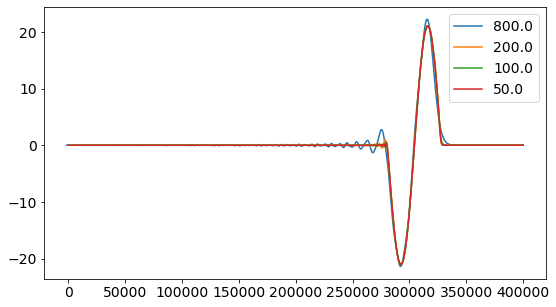

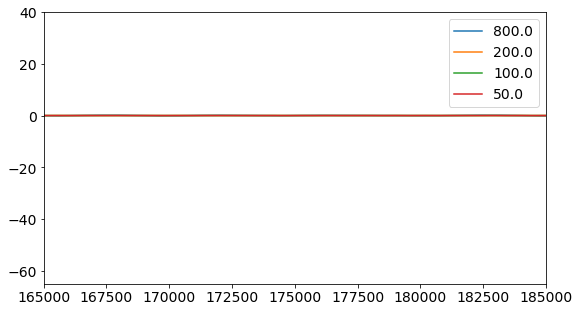

In [20]:
plt.figure(figsize=(9,5))
for mykdv in all_kdv_dx_s:
    plt.plot(mykdv.x, mykdv.B, label=mykdv.dx_s)
# plt.xlim((162200, 163600))
plt.legend()
plt.show()

plt.figure(figsize=(9,5))
for mykdv in all_kdv_dx_s:
    plt.plot(mykdv.x, mykdv.B, label=mykdv.dx_s)
# plt.xlim((162200, 163600))
plt.ylim((-65, 40))
plt.xlim((250000, 300000))
plt.legend()


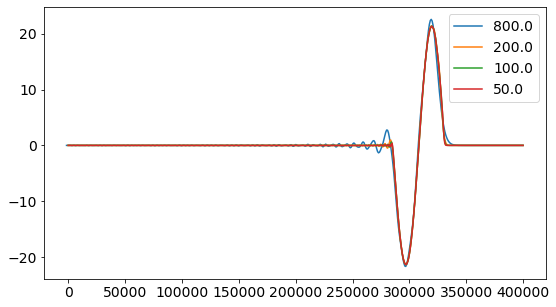

(135000.0, 170000.0)

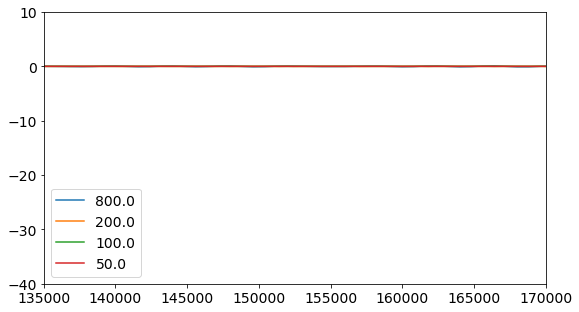

In [21]:
plt.figure(figsize=(9,5))
for mykdv in all_kdv_dx_w:
    plt.plot(mykdv.x, mykdv.B, label=mykdv.dx_s)
plt.legend()
plt.show()

plt.figure(figsize=(9,5))
for mykdv in all_kdv_dx_w:
    plt.plot(mykdv.x, mykdv.B, label=mykdv.dx_s)
    
plt.legend()
plt.ylim((-40, 10))
plt.xlim((250000, 300000))

In [22]:
# Compute the errors
X = np.arange(0,L_d, 10.)
nx = X.shape[0]
ndx = len(dxs)

solns = np.zeros((ndx, nx))
for ii, mykdv in enumerate(all_kdv_dx_w):
    Fx = pchip(mykdv.x, mykdv.B)
    solns[ii,:] = Fx(X)

# Compute the error between each solution
#err = np.diff(solns, axis=0)
err = solns - solns[-1,:]

err_rms_w = np.linalg.norm(err, ord=2, axis=1) # L2-norm
#err_rms_w = np.sqrt(np.mean(err**2,axis=1))

solns = np.zeros((ndx, nx))
for ii, mykdv in enumerate(all_kdv_dx_s):
    Fx = pchip(mykdv.x, mykdv.B)
    solns[ii,:] = Fx(X)

# Compute the error between each solution
#err = np.diff(solns, axis=0)
err = solns - solns[-1,:]

err_rms_s = np.linalg.norm(err, ord=2, axis=1) # L2-norm
#err_rms_s = np.sqrt(np.mean(err**2,axis=1))



C:\ProgramData\Anaconda3\lib\site-packages\scipy\interpolate\_cubic.py:288: RuntimeWarning: overflow encountered in true_divide
  whmean = (w1/mk[:-1] + w2/mk[1:]) / (w1 + w2)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\interpolate\_cubic.py:288: RuntimeWarning: overflow encountered in add
  whmean = (w1/mk[:-1] + w2/mk[1:]) / (w1 + w2)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\interpolate\_cubic.py:288: RuntimeWarning: invalid value encountered in add
  whmean = (w1/mk[:-1] + w2/mk[1:]) / (w1 + w2)


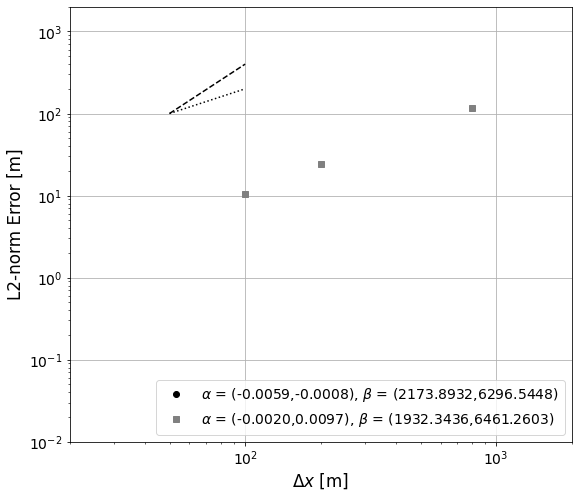

In [24]:
plt.figure(figsize=(9,8))
plt.loglog(dxs[:-1],err_rms_s[:-1],'ko')
plt.loglog(dxs[:-1],err_rms_w[:-1],'s', color='0.5')
plt.xlim(2e1,2e3)
plt.ylim(1e-2,2e3)
plt.grid(b=True)
x0 = np.array([50,100.])

plt.plot(x0, 100/x0[0]**2*x0**2, 'k--')
plt.plot(x0, 100/x0[0]**1*x0**1, 'k:')

plt.ylabel('L2-norm Error [m]')
plt.xlabel('$\Delta x$ [m]')

alpha_s = -2*all_kdv_dx_s[0].c1*all_kdv_dx_s[0].r10 
beta_s = -1*all_kdv_dx_s[0].r01
alpha_w = -2*all_kdv_dx_w[0].c1*all_kdv_dx_w[0].r10 
beta_w = -1*all_kdv_dx_w[0].r01

plt.legend((r'~\Deltax$^1$',
            r'$\alpha$ = (%3.4f,%3.4f), $\beta$ = (%3.4f,%3.4f)'%(min(alpha_s), max(alpha_s), min(beta_s), max(beta_s)),
           r'$\alpha$ = (%3.4f,%3.4f), $\beta$ = (%3.4f,%3.4f)'%(min(alpha_w), max(alpha_w), min(beta_w), max(beta_w))), loc='lower right')

In [25]:
# Delta t comparison
dts = [20,10.,5,2.5,1.25,0.6,0.3]
dx = 50.

all_kdv_dt_w = []
all_kdv_dt_s = []

for dt in dts:
    
    print(' ')
    print('Running dt={}'.format(dt))
    print(' ')
    
    mykdv, B = run_kdv( (betas_w, bathy_params, a0, L_d, mode, nu_H, dx, runtime, dt, Lw_w))
    all_kdv_dt_w.append(mykdv)
    
    mykdv, B = run_kdv( (betas_s, bathy_params, a0, L_d, mode, nu_H, dx, runtime, dt, Lw_s))
    all_kdv_dt_s.append(mykdv)
    
    print(' ')
    print('Completed dt={}'.format(dt))
    print(' ')
    

 
Running dt=20
 
Calculating eigenfunctions...
0.0 % complete...
5.0 % complete...
10.0 % complete...
15.0 % complete...
20.0 % complete...
25.0 % complete...
30.0 % complete...
35.0 % complete...
40.0 % complete...
45.0 % complete...
50.0 % complete...
55.0 % complete...
60.0 % complete...
65.0 % complete...
70.0 % complete...
75.0 % complete...
80.0 % complete...
85.0 % complete...
90.0 % complete...
95.0 % complete...
100.0 % complete...
Calculating nonlinear structure functions...
0.0 % complete...
5.0 % complete...
10.0 % complete...
15.0 % complete...
20.0 % complete...
25.0 % complete...
30.0 % complete...
35.0 % complete...
40.0 % complete...
45.0 % complete...
50.0 % complete...
55.0 % complete...
60.0 % complete...
65.0 % complete...
70.0 % complete...
75.0 % complete...
80.0 % complete...
85.0 % complete...
90.0 % complete...
95.0 % complete...
100.0 % complete...
Calculating buoyancy coefficients...
Done with dx=50.0 and dt=20
Calculating eigenfunctions...
0.0 % complete..

15.0 % complete...
20.0 % complete...
25.0 % complete...
30.0 % complete...
35.0 % complete...
40.0 % complete...
45.0 % complete...
50.0 % complete...
55.0 % complete...
60.0 % complete...
65.0 % complete...
70.0 % complete...
75.0 % complete...
80.0 % complete...
85.0 % complete...
90.0 % complete...
95.0 % complete...
100.0 % complete...
Calculating buoyancy coefficients...
Done with dx=50.0 and dt=1.25
Calculating eigenfunctions...
0.0 % complete...
5.0 % complete...
10.0 % complete...
15.0 % complete...
20.0 % complete...
25.0 % complete...
30.0 % complete...
35.0 % complete...
40.0 % complete...
45.0 % complete...
50.0 % complete...
55.0 % complete...
60.0 % complete...
65.0 % complete...
70.0 % complete...
75.0 % complete...
80.0 % complete...
85.0 % complete...
90.0 % complete...
95.0 % complete...
100.0 % complete...
Calculating nonlinear structure functions...
0.0 % complete...
5.0 % complete...
10.0 % complete...
15.0 % complete...
20.0 % complete...
25.0 % complete...
30.0 

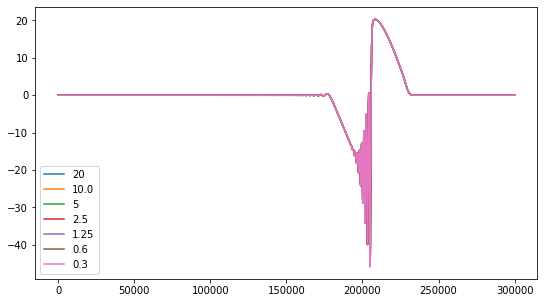

(195000, 210000)

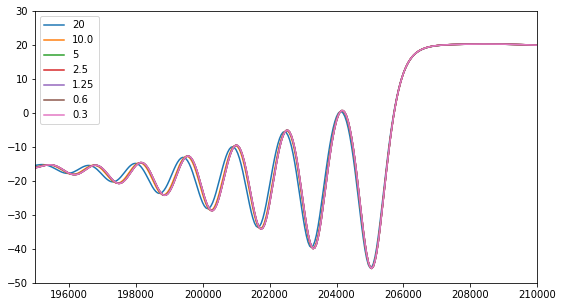

In [45]:
plt.figure(figsize=(9,5))
for mykdv in all_kdv_dt_s:
    plt.plot(mykdv.x, mykdv.B, label=mykdv.dt_s)
plt.legend()
plt.show()

plt.figure(figsize=(9,5))
for mykdv in all_kdv_dt_s:
    plt.plot(mykdv.x, mykdv.B, label=mykdv.dt_s)
    
plt.legend()
plt.ylim((-50, 30))
plt.xlim((195000, 210000))

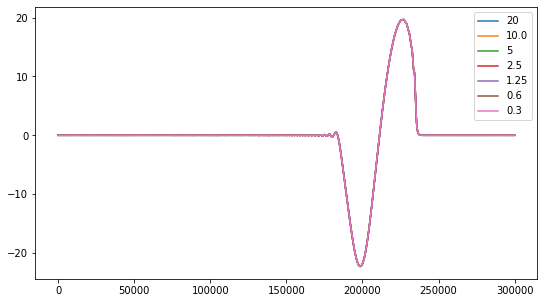

(175000, 205000)

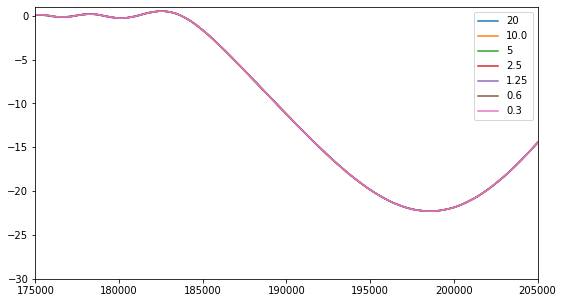

In [37]:
plt.figure(figsize=(9,5))
for mykdv in all_kdv_dt_w:
    plt.plot(mykdv.x, mykdv.B, label=mykdv.dt_s)
plt.legend()
plt.show()

plt.figure(figsize=(9,5))
for mykdv in all_kdv_dt_w:
    plt.plot(mykdv.x, mykdv.B, label=mykdv.dt_s)
    
plt.legend()
plt.ylim((-30, 1))
plt.xlim((175000, 205000))

In [46]:
# Compute the errors
X = np.arange(0,L_d, 10.)
nx = X.shape[0]
ndx = len(dts)

solns = np.zeros((ndx, nx))
for ii, mykdv in enumerate(all_kdv_dt_w):
    print(ii)
    Fx = pchip(mykdv.x, mykdv.B)
    solns[ii,:] = Fx(X)

# Compute the error between each solution
#err = np.diff(solns, axis=0)
err = solns - solns[-1,:]

err_rms_w_t = np.linalg.norm(err, ord=2, axis=1) # L2-norm
#err_rms_w = np.sqrt(np.mean(err**2,axis=1))

solns = np.zeros((ndx, nx))
for ii, mykdv in enumerate(all_kdv_dt_s):
    print(ii)
    Fx = pchip(mykdv.x, mykdv.B)
    solns[ii,:] = Fx(X)

# Compute the error between each solution
#err = np.diff(solns, axis=0)
err = solns - solns[-1,:]

err_rms_s_t = np.linalg.norm(err, ord=2, axis=1) # L2-norm
#err_rms_s = np.sqrt(np.mean(err**2,axis=1))

0
1
2
3
4
5
6
0
1
2
3
4
5
6


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:28: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.


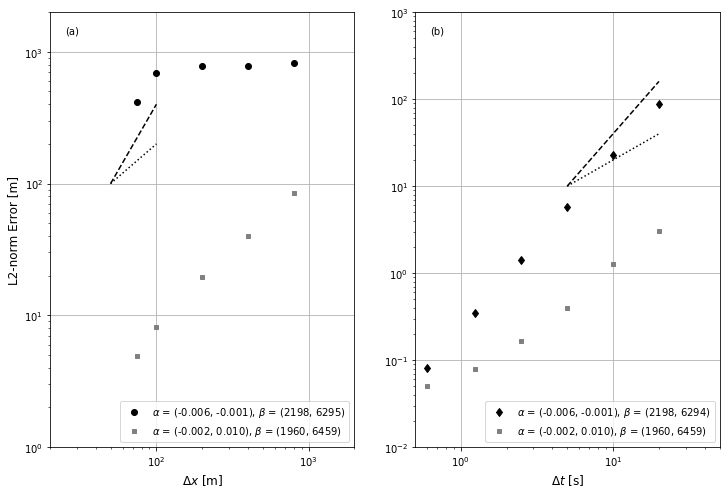

In [49]:
plt.figure(figsize=(12,8))
ax=plt.subplot(121)
plt.loglog(dxs[:-1],err_rms_s[:-1],'ko', markersize=6)
plt.loglog(dxs[:-1],err_rms_w[:-1],'s', color='0.5', markersize=4)
plt.xlim(2e1,2e3)
plt.ylim(1e0,2e3)
plt.grid(b=True)
x0 = np.array([50,100.])
plt.plot(x0, 100/x0[0]**2*x0**2, 'k--')
plt.plot(x0, 100/x0[0]**1*x0**1, 'k:')
plt.ylabel('L2-norm Error [m]')
plt.xlabel('$\Delta x$ [m]')

alpha_s = -2*all_kdv_dx_s[0].c1*all_kdv_dx_s[0].r10 
beta_s = -1*all_kdv_dx_s[0].r01
alpha_w = -2*all_kdv_dx_w[0].c1*all_kdv_dx_w[0].r10 
beta_w = -1*all_kdv_dx_w[0].r01

plt.legend((r'$\alpha$ = (%3.3f, %3.3f), $\beta$ = (%3.0f, %3.0f)'%(min(alpha_s), max(alpha_s), min(beta_s), max(beta_s)),
           r'$\alpha$ = (%3.3f, %3.3f), $\beta$ = (%3.0f, %3.0f)'%(min(alpha_w), max(alpha_w), min(beta_w), max(beta_w))), loc='lower right')

plt.text(0.05,0.95,'(a)',transform=ax.transAxes)


ax=plt.subplot(122)
plt.loglog(dts[:-1],err_rms_s_t[:-1],'kd', markersize=6)
plt.loglog(dts[:-1],err_rms_w_t[:-1],'s', color='0.5', markersize=4)
plt.xlim(0,0.5e2)
plt.ylim(1e-2,1e3)
plt.grid(b=True)
x0 = np.array([5,20])
plt.plot(x0, 10/x0[0]**2*x0**2, 'k--')
plt.plot(x0, 10/x0[0]**1*x0**1, 'k:')
#plt.ylabel('L2-norm Error [m]')
plt.xlabel('$\Delta t$ [s]')

plt.text(0.05,0.95,'(b)',transform=ax.transAxes)
alpha_s = -2*all_kdv_dt_s[0].c1*all_kdv_dt_s[0].r10 
beta_s = -1*all_kdv_dt_s[0].r01
alpha_w = -2*all_kdv_dt_w[0].c1*all_kdv_dt_w[0].r10 
beta_w = -1*all_kdv_dt_w[0].r01

plt.legend((r'$\alpha$ = (%3.3f, %3.3f), $\beta$ = (%3.0f, %3.0f)'%(min(alpha_s), max(alpha_s), min(beta_s), max(beta_s)),
           r'$\alpha$ = (%3.3f, %3.3f), $\beta$ = (%3.0f, %3.0f)'%(min(alpha_w), max(alpha_w), min(beta_w), max(beta_w))), loc='lower right')

plt.savefig('../FIGURES/vkdv_convergence_dxdt.png',dpi=150)
plt.savefig('../FIGURES/vkdv_convergence_dxdt.pdf',dpi=150)